# The electric field

The best way to learn a language is to use it. Thus, we admire a nice example of how to plot electric fields, from
(https://github.com/surelyourejoking/ElectrodynamicsPy/blob/master/images/point_charges.png)
Open the file src/point_charges_2D.py and discover the class Charge, and forget about all your prejudices about ...textfiles, physics, math, etc. and focus on the class formalism<br>
It can be argued that all of electrodynamics stems from the electric field of a point charge. So why start with one point charge, and the modules in the folder src, so nice.


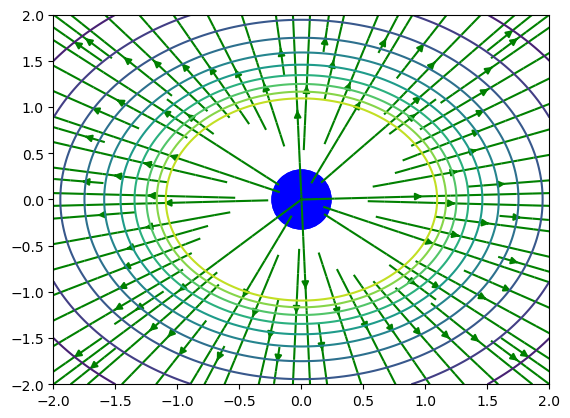

In [20]:
%matplotlib inline
from src.point_charges_2D import Charge
 
# The plotting grid is a square centred at the origin
xs = ys = [-2, 2] 

# Instantiate a point charge called c, with a charge of 1, at the coordinates (0,0).
c = Charge(50, [0, 0])

# Plot
Charge.plot_field(xs, ys, show_charge=True, field=True, potential=True)



## Multiple point charges

We'll examine the classic dipole. Let's start with just the field lines:


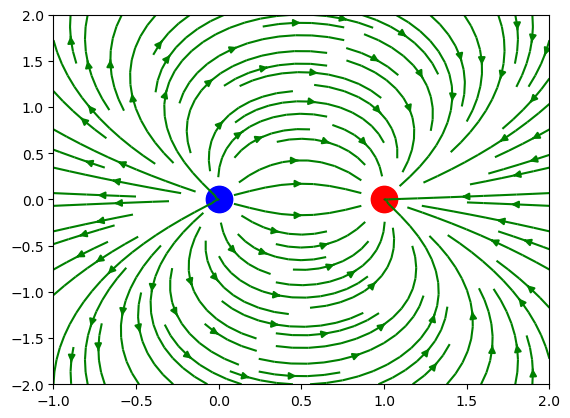

In [23]:
# After every plot we have to reset the charge registry

Charge.reset()
xs, ys = [-1, 2], [-2, 2]
A = Charge(10, [0, 0])
B = Charge(-10, [1, 0])
Charge.plot_field(xs, ys, show_charge=True, field=True, potential=False)

The potential is still looking funny. If you really need a good potential plot, do not use the built in `plot_field` function! Use the rest of the module to calculate V, but before plotting, multiply that V by a large number (1000 should work) to get the equipotentials to show up nicely.

But the default plot doesn't always return awful results for potential:


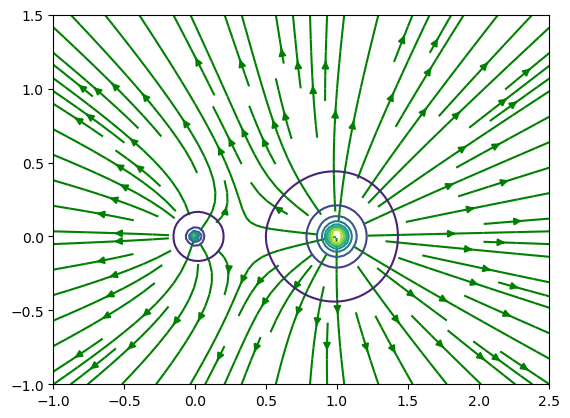

In [27]:
Charge.reset()
A = Charge(1, [0, 0])
B = Charge(4, [1, 0])

xs = [-1, 2.5]
ys = [-1, 1.5]

Charge.plot_field(xs, ys, show_charge=False, field=True, potential=True)


We can obviously try more complex charge distributions, but the stream plot sometimes gets a bit wonky. 
 


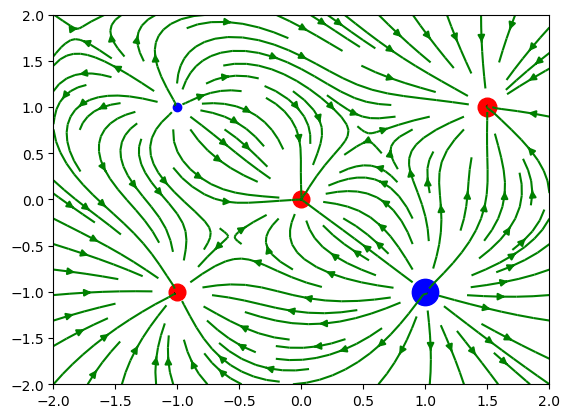

In [28]:
Charge.reset()
xs = ys = [-2, 2]
A = Charge(1, [-1, 1])
B = Charge(-5, [1.5, 1])
C = Charge(10, [1, -1])
D = Charge(-4, [0, 0])
E = Charge(-4, [-1,-1])
Charge.plot_field(xs, ys, show_charge=True, field=True, potential=False)

On second thought, it doesn't look too terrible here. But if you try putting identical charges at the corners of a square, 
you'll see what I mean (I'm too embarassed to put it here).  

Note that we don't really have to instantiate each charge using `A = Charge(..)`, we can just write `Charge()`. We will abuse this later on. 

Also, note how the size of the circle on the diagram is proportional to the charge (to be precise, the markersize is 
proportional to the square root of the charge). 

Ok fine you can see. 


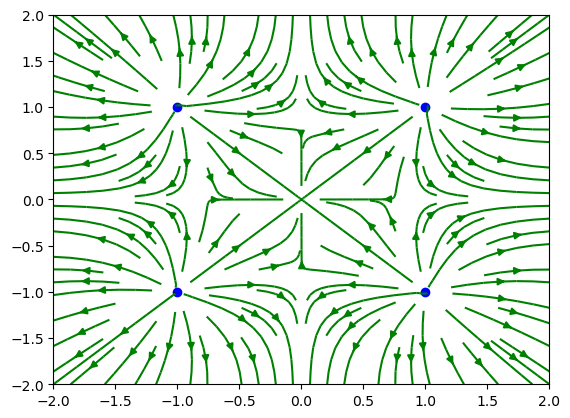

In [29]:
Charge.reset()
xs = ys = [-2, 2]
A = Charge(1, [-1, 1])
B = Charge(1, [1, 1])
C = Charge(1, [1, -1])
D = Charge(1, [-1, -1])
Charge.plot_field(xs, ys, show_charge=True, field=True, potential=False)

Yeah, not too happy with it. Never mind.

So we've had a look at the different things we can do with point charges. But in fact, we can combine point charges in all sorts of ways, to look at the field of charge distributions (still 2D for now). 

## Line charges

A line charge can simply be thought of as many point charges in a line... In fact, if we are at the origin:

$$ \mathbf{E}(\mathbf{r}) = \frac{1}{4 \pi \epsilon_0} \int \frac{\lambda}{r^2} \mathbf{\hat{r}} dl $$

Which means that a line charge is really the limit of many point charges. Have a look at the actual code in `charge_distribution_2D`; I won't go into it here. Let's look at some examples:



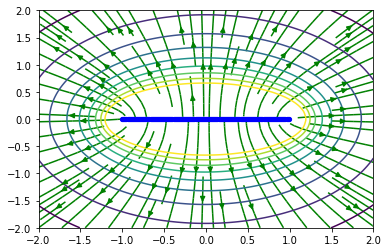

In [16]:
from charge_distribution_2D import straight_line_charge

Charge.reset()
xs = ys = [-2, 2]

# A line of charge on the x axis, with total charge of 1, going from (-1,0) to (1,0).
straight_line_charge([-1, 0], [1, 0], res=80, Q=1)

Charge.plot_field(xs, ys, show_charge=True, field=True, potential=True)

We're starting to get some pretty plots!

`res` is a parameter that determines the 'resolution' of the line – specifically, how many point charges per unit length. I've found 80 to be sufficient for most purposes. 

A 2D 'capacitor' of sorts:


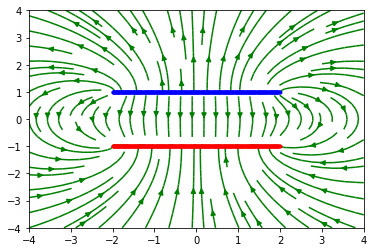

In [19]:
Charge.reset()
xs = ys = [-4, 4]
straight_line_charge([-2, 1], [2, 1], res=80, Q=1)
straight_line_charge([-2, -1], [2, -1], res=80, Q=-1)

# The default plot shows the field and the charge, but not the potential. 
Charge.plot_field(xs, ys)

What about more general (non-straight) line charges? I wrote a separate method for this afterwards, in which we can specify the curve as parametric equations.

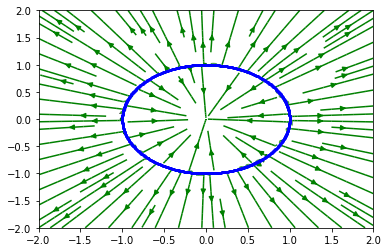

In [19]:
import numpy as np
from charge_distribution_2D import line_charge

Charge.reset()
xs = ys = [-2, 2]

# The parametric equations of a circle
def x(t):
    return np.cos(t)
def y(t):
    return np.sin(t)

# Create the circle
line_charge(parametric_x=x, parametric_y=y, trange=2*np.pi, res=100, Q=10)
Charge.plot_field(xs, ys)

However, I much prefer to use lambdas in the call to `line_charge()`, in which case the above would instead be:

`line_charge(parametric_x=lambda t: np.cos(t), parametric_y=lambda t: np.sin(t), trange=2*np.pi, res=100, Q=10)`

Of course, since this method is more general than `straight_line_charge()`, we can also use it to draw a straight line. But I will keep both methods in the module because I would much rather specify a straight line with it's start and end points rather than parametric equations. 


## Rectangles of charge

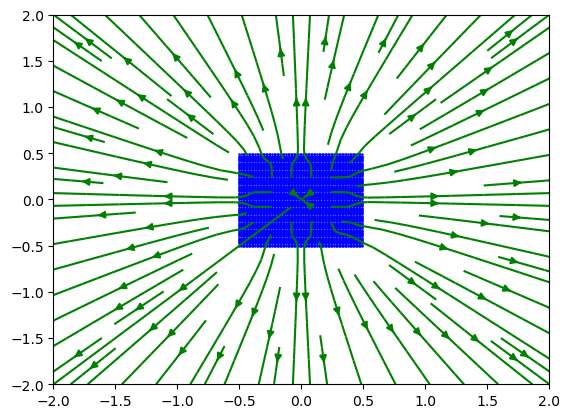

In [7]:
from charge_distribution_2D import rectangle_charge

Charge.reset()
xs = ys = [-2, 2]

# Create a rectangle (or rather square), with a length and height of 1, and corner at (-0.5,0.5). 
rectangle_charge([1, 1], [-0.5, -0.5], res=80, Q=100)
Charge.plot_field(xs, ys)